
### **GutHealth Meal Planner**

_Project Overview_

In the evolving landscape of personalized wellness, gut microbiome analysis has emerged as a key driver in optimizing nutrition and health outcomes. Research suggests that a person's unique gut bacteria profile can influence how their body processes food, responds to inflammation, and manages chronic conditions.

This project explores the intersection of gut health, dietary intake, and machine learning by building a predictive system that suggests tailored meal plans based on biological and lifestyle data. The model leverages distributed computing using PySpark to efficiently process and analyze a rich dataset.

_Problem Statement_

The challenge addressed in this project is:

How can we predict the most suitable meal plan for an individual, given their gut microbiome composition, nutrient intake patterns, allergy information, and demographic data?

Using Spark’s logistic regression algorithm, we aim to train a model that makes accurate, interpretable predictions while scaling to larger datasets.



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
# Start Spark session
spark = SparkSession.builder.appName("GutHealthLogisticRegression").getOrCreate()

In [0]:
# Load dataset
df = spark.read.csv("/FileStore/tables/microbe_gut_health_data_2.csv", header=True, inferSchema=True)
display(df)

Bacteroides,Firmicutes,Lactobacillus,Proteobacteria,Actinobacteria,Verrucomicrobia,Others,Age,Gender,BMI,Protein_Intake,Fiber_Intake,Carbohydrate_Intake,Fat_Intake,Dairy_Allergy,Gluten_Allergy,Nut_Allergy,Suggested_Meal_Plan
32.483570765056164,53.99355436586002,8.649643450051236,3.092192442122609,4.136506395035066,2.788120158988648,5.2867889136418,61,Male,21.4,Low,Low,High,Moderate,0,0,0,Gut-Health Fiber Boost
29.308678494144075,49.246336829127685,9.710962658568965,4.139614989220498,4.9687965110609165,2.773292945808073,27.954425872525377,32,Female,23.8,Moderate,Moderate,Moderate,High,1,0,0,Metabolic Maintenance Diet
33.23844269050346,40.59630369920174,8.415160158000077,4.586394466578356,5.018016872044447,2.1021784136849924,4.450908896591372,60,Female,26.6,High,Moderate,Low,Moderate,0,1,0,Keto-Friendly Low-Sugar Plan
37.61514928204013,33.53063222294426,9.38407694072192,6.887687657340191,5.472630345843406,2.8349549041492814,12.10224337430121,25,Female,24.6,High,Moderate,Low,Low,0,0,0,Keto-Friendly Low-Sugar Plan
28.829233126383322,46.982233136135896,6.212770666092428,5.5565531245337585,3.6331416367191736,3.3664145409108723,-3.1435337265116914,66,Male,23.5,High,Low,Moderate,High,0,0,0,Gut-Health Fiber Boost
28.8293152152541,43.934853854217494,10.426587414745876,3.6645184309001086,5.59256727384733,2.3628839404616024,-4.063369519275113,35,Female,21.2,Low,Moderate,Moderate,Low,0,0,0,Metabolic Maintenance Diet
37.896064077536955,48.95193220027733,10.002410950724448,5.486036289417637,2.295608368397225,3.5242413255252965,-8.24170707536912,24,Female,24.6,Moderate,Moderate,High,Moderate,0,0,1,Mediterranean Gut Balance
33.837173645764544,46.351718016819696,8.365822737863619,3.4526960110616347,4.37011544763619,3.243887410542169,-1.432312970644034,64,Female,25.7,Low,Moderate,Moderate,High,0,1,0,Gut-Health Fiber Boost
27.65262807032524,50.49552715319335,11.31849133686481,6.082691053887073,4.5117261575484555,2.632883339014481,-10.969958302546985,53,Female,22.0,Moderate,Moderate,Moderate,Moderate,0,0,0,Gut-Health Fiber Boost
32.712800217929825,34.64764788439432,11.875140275253116,4.528875348182122,5.633326826071238,2.929235181331076,-7.240481287077245,25,Female,24.4,Low,Moderate,Low,Low,0,0,0,Keto-Friendly Low-Sugar Plan


### 🧬 What kind of data do we have?

Each row in our dataset represents a person and includes:

- **Gut microbes**: like Bacteroides, Firmicutes, etc.
- **Food intake categories**: like fat, carbs, fiber
- **Allergy information**: whether someone has a nut, gluten, or dairy allergy
- **Basic demographics**: age, BMI (body mass index)
- **Suggested Meal Plan**: the correct recommendation that our model should learn to predict

But before we train the model, we need to understand the data by using Exploratory Data Analysis.


In [0]:
df.createOrReplaceTempView("gut_data")


The below query calculates how many distinct meal plan categories exist in the dataset.
This is important for:

Understanding the number of output classes for the classification model

Deciding whether multiclass logistic regression is appropriate

In [0]:

%sql

SELECT COUNT(DISTINCT Suggested_Meal_Plan) AS num_classes
FROM gut_data;


num_classes
7


The below query shows how many times each Suggested_Meal_Plan appears in the dataset, sorted from most to least frequent.

Why this matters:

It helps reveal class imbalance (some plans are very common, others are rare)

Guides our decision to balance the classes before training the model

Shows which meal plans dominate the dataset — e.g., "Keto-Friendly Low-Sugar Plan" may appear much more often than "Heart Health Plus"



In [0]:

%sql
SELECT Suggested_Meal_Plan, COUNT(*) AS count
FROM gut_data
GROUP BY Suggested_Meal_Plan
ORDER BY count DESC


Suggested_Meal_Plan,count
Keto-Friendly Low-Sugar Plan,441
Gut-Health Fiber Boost,285
Metabolic Maintenance Diet,198
Mediterranean Gut Balance,64
Dairy-Free Anti-Inflammation Plan,6
Digestive Relief (Low-FODMAP),4
Heart Health Plus,2


Databricks visualization. Run in Databricks to view.

The below query breaks down how many individuals of each gender were recommended each type of meal plan.

Why it's useful:

Helps explore whether certain meal plans are more common among males or females

Supports exploratory data analysis (EDA) to detect gender-based trends or biases

This insight can help explain feature importance when interpreting model predictions

In the visualization, each meal plan is shown with a split bar chart where:

Orange = Female

Blue = Male

In [0]:

%sql
SELECT Suggested_Meal_Plan, Gender, COUNT(*) AS count
FROM gut_data
GROUP BY Suggested_Meal_Plan, Gender
ORDER BY Suggested_Meal_Plan


Suggested_Meal_Plan,Gender,count
Dairy-Free Anti-Inflammation Plan,Male,1
Dairy-Free Anti-Inflammation Plan,Female,5
Digestive Relief (Low-FODMAP),Female,1
Digestive Relief (Low-FODMAP),Male,3
Gut-Health Fiber Boost,Male,142
Gut-Health Fiber Boost,Female,143
Heart Health Plus,Male,2
Keto-Friendly Low-Sugar Plan,Male,210
Keto-Friendly Low-Sugar Plan,Female,231
Mediterranean Gut Balance,Female,32


Databricks visualization. Run in Databricks to view.

### Removing Missing Information

Sometimes, real-world data has missing values (blanks). These can confuse the model.

We use this code to **remove rows with missing values**:
```python
df = df.dropna()


In [0]:
# Drop rows with nulls (if any)
df = df.dropna()




## Merging Rare Meal Plans into a Combined Category

### Why this step?

Some meal plan classes appear very rarely in the dataset — too few samples can hurt model performance because:
- The model won’t have enough examples to learn patterns for those classes
- These rare classes may cause overfitting or confusion during prediction

To solve this, we group them into a single broader class called **"Balanced Wellness Plan"**. This keeps the model balanced and still retains meaningful dietary grouping.

---


In [0]:
# Re-run code generation after kernel reset

from pyspark.sql.functions import when, col
 
# Define the classes to merge
classes_to_merge = [
    "Mediterranean Gut Balance",
    "Heart Health Plus",
    "Dairy-Free Anti-Inflammation Plan",
    "Digestive Relief (Low-FODMAP)"
]
 
# Create a new column with merged class name
df = df.withColumn(
    "Meal_Plan_Combined",
    when(col("Suggested_Meal_Plan").isin(classes_to_merge), "Balanced Wellness Plan")
    .otherwise(col("Suggested_Meal_Plan"))
)

In [0]:
# Target count for balanced representation
#target_count = 150
target_count = 200
#target_count = 250
 
from pyspark.sql.functions import col, rand
 
# Filter and upsample the Balanced Wellness Plan
bwp_df = df.filter(col("Meal_Plan_Combined") == "Balanced Wellness Plan")
factor = int(target_count / bwp_df.count()) + 1
 
bwp_upsampled = (
    bwp_df.withColumn("rand", rand())
    .sample(withReplacement=True, fraction=float(factor), seed=42)
    .drop("rand")
    .limit(target_count)
)
 
# Keep all other classes as-is
others_df = df.filter(col("Meal_Plan_Combined") != "Balanced Wellness Plan")
 
# Combine the final balanced dataset
df_balanced = others_df.union(bwp_upsampled)
 
# Check new distribution
df_balanced.groupBy("Meal_Plan_Combined").count().orderBy("count", ascending=False).display()
 
 

Meal_Plan_Combined,count
Keto-Friendly Low-Sugar Plan,441
Gut-Health Fiber Boost,285
Balanced Wellness Plan,200
Metabolic Maintenance Diet,198


## Visualizing Class Distribution

In this step, we visualized how our dataset is distributed across the different meal plan classes after applying our balancing logic.

### PySpark: Distributed Calculation

We used **PySpark** to calculate the number of records in each `Meal_Plan_Combined` class. By using the `.groupBy().count()` method, we preserved the benefits of Spark's **distributed computing** — allowing us to handle large-scale datasets efficiently without moving data to the driver node prematurely.

###  Pandas: Bringing Results to Driver

After aggregating the class counts with Spark, we converted the result to a **Pandas DataFrame** using `.toPandas()`. This step is lightweight because we're only transferring a small summary table to the driver.

### Python: Plotting with Seaborn

Once in Pandas, we used **Seaborn** and **Matplotlib** to generate a bar plot of the class distribution. This visual confirms whether our balancing approach worked as intended and whether the dataset is ready for training a fair model.


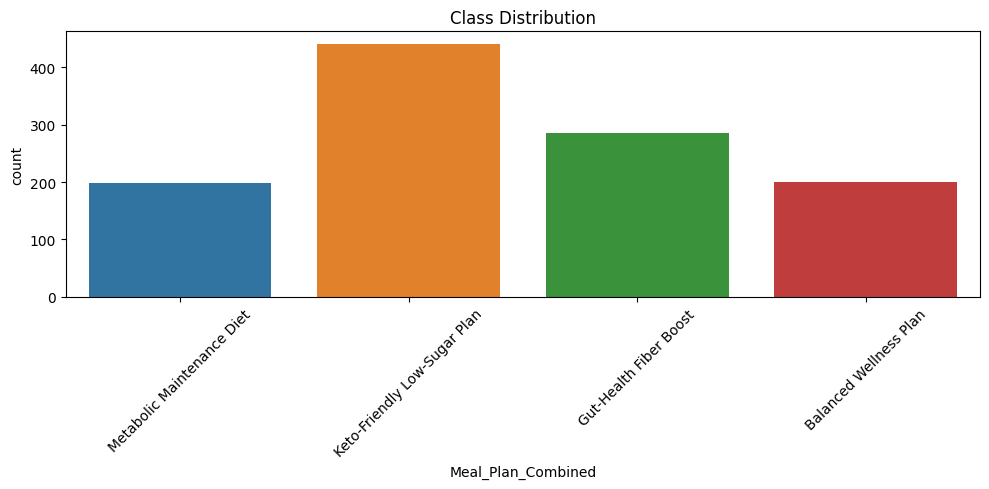

In [0]:
# PySpark: compute class counts
class_counts = df_balanced.groupBy("Meal_Plan_Combined").count()

# Collect to driver for plotting
pdf = class_counts.toPandas()

# Python: plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=pdf, x="Meal_Plan_Combined", y="count")
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()


In [0]:
df_balanced.groupBy("Meal_Plan_Combined").count().orderBy("count", ascending=False).show()


+--------------------+-----+
|  Meal_Plan_Combined|count|
+--------------------+-----+
|Keto-Friendly Low...|  441|
|Gut-Health Fiber ...|  285|
|Balanced Wellness...|  200|
|Metabolic Mainten...|  198|
+--------------------+-----+



## 🔠 Encoding Categorical Features and Label

To prepare the dataset for machine learning, all text-based categorical features must be converted into numeric format.

- `target_col` is set to `"Meal_Plan_Combined"` — the target we want to predict.
- `categorical_cols` includes features like `"Gender"`, `"Protein_Intake"`, etc.

Using `StringIndexer`, we convert each categorical column (and the target) into a new numeric column with `_Idx` suffix.

This step is essential because machine learning models in PySpark **require all inputs and labels to be numeric**.


In [0]:
# Target variable
target_col = "Meal_Plan_Combined"

# Categorical features to encode
categorical_cols = ["Gender", "Protein_Intake", "Fiber_Intake", "Carbohydrate_Intake", "Fat_Intake"]

In [0]:
# Index categorical + label column
indexers = [StringIndexer(inputCol=c, outputCol=c+"_Idx") for c in categorical_cols + [target_col]]
for indexer in indexers:
    df_balanced = indexer.fit(df_balanced).transform(df_balanced)

## Encoding and Assembling Features for Modeling

### One-Hot Encoding Categorical Features
After indexing, we applied `OneHotEncoder` to transform each categorical index into a binary vector (`*_Vec`).  
This prevents the model from assuming any ordinal relationship between categories (e.g., 0 < 1 < 2).

### Combining Numeric and Encoded Features
We defined `numeric_cols` (continuous inputs like microbiome values, age, BMI, allergies) and added all one-hot encoded categorical columns to create `feature_cols`.

### Assembling Final Feature Vector
Using `VectorAssembler`, we combined all selected columns into a single vector column named `"assembled_features"`.  
This is the required input format for Spark ML models like `LogisticRegression`, ensuring the model processes all inputs together.

This step finalizes the feature engineering process before model training.


In [0]:
# One-Hot Encode indexed categorical columns
encoder = OneHotEncoder(
    inputCols=[c+"_Idx" for c in categorical_cols],
    outputCols=[c+"_Vec" for c in categorical_cols]
)
df_balanced = encoder.fit(df_balanced).transform(df_balanced)

In [0]:
# Final features
numeric_cols = [
    "Bacteroides", "Firmicutes", "Lactobacillus", "Proteobacteria",
    "Actinobacteria", "Verrucomicrobia", "Others", "Age", "BMI",
    "Dairy_Allergy", "Gluten_Allergy", "Nut_Allergy"
]
feature_cols = numeric_cols + [c+"_Vec" for c in categorical_cols]


In [0]:
# Assemble features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="assembled_features")
df_balanced = assembler.transform(df_balanced)


## Final Preparation Before Model Training

### Feature Scaling
We used `StandardScaler` to normalize all features in the `"assembled_features"` vector. This ensures that no single feature dominates due to scale differences.

### Repartitioning for Performance
We repartitioned the data into 8 parts to improve parallel processing during model training.

### Final Dataset for ML
We selected only two columns:
- `"features"`: the final input vector for the model
- `"label"`: the indexed target variable (`Meal_Plan_Combined_Idx`)

### Train/Test Split
Finally, we split the dataset into training (80%) and test (20%) sets to evaluate model performance fairly.


In [0]:
# Scale features
scaler = StandardScaler(inputCol="assembled_features", outputCol="features")
df_balanced = scaler.fit(df_balanced).transform(df_balanced)


In [0]:
# STEP 1: Repartition before modeling to optimize parallelism
df_balanced = df_balanced.repartition(8)

# STEP 2: Create final dataset with required columns for ML
final_df_balanced = df_balanced.select(
    "features",
    col(target_col + "_Idx").alias("label")
)

# STEP 3: Train/test split
train_df, test_df = final_df_balanced.randomSplit([0.8, 0.2], seed=42)


In [0]:
lr = LogisticRegression(
    featuresCol="features",
    labelCol="label",
    maxIter=50,
    regParam=0.01,
    elasticNetParam=0.1
)


In [0]:

model = lr.fit(train_df)


In [0]:
# Predictions
predictions = model.transform(test_df)
predictions.select("label", "prediction", "probability")


DataFrame[label: double, prediction: double, probability: vector]

In [0]:
# Evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8978


In [0]:
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")

print(f"F1 Score: {evaluator_f1.evaluate(predictions):.4f}")
print(f"Weighted Precision: {evaluator_precision.evaluate(predictions):.4f}")
print(f"Weighted Recall: {evaluator_recall.evaluate(predictions):.4f}")


F1 Score: 0.8968
Weighted Precision: 0.9037
Weighted Recall: 0.8978


## Model Evaluation Summary

- **Accuracy**: 89.78%  
  → Overall, the model correctly predicted the meal plan for nearly 90% of test samples.

- **F1 Score**: 89.68%  
  → A strong balance between precision and recall, indicating the model performs well across all classes, not just the most frequent ones.

- **Weighted Precision**: 90.37%  
  → When the model predicts a class, it's correct 90% of the time on average, weighted by class frequency.

- **Weighted Recall**: 89.78%  
  → The model captures nearly 90% of all true instances across classes, again weighted by class size.

These metrics confirm that the logistic regression model is both accurate and balanced in performance, even in a multiclass setting with some class imbalance.


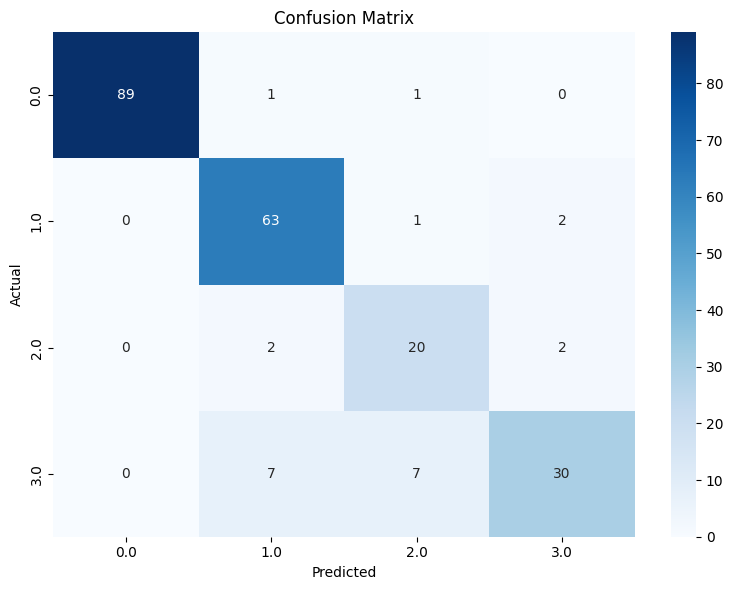

In [0]:
from pyspark.sql.functions import col, count

# Step 1: Group and count in PySpark
conf_matrix_spark = predictions.groupBy("label", "prediction").agg(count("*").alias("count"))

# Step 2: Pivot the table to get confusion matrix shape
conf_matrix_pivot = (
    conf_matrix_spark
    .groupBy("label")
    .pivot("prediction")
    .sum("count")
    .na.fill(0)  # Fill missing values with 0
    .orderBy("label")  # Optional: keep label order sorted
)

# Step 3: Convert to Pandas for visualization only
conf_matrix_pdf = conf_matrix_pivot.toPandas()
conf_matrix_pdf.set_index("label", inplace=True)

# Step 4: Visualize using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pdf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



## Confusion Matrix (Model Evaluation)

We computed the confusion matrix using PySpark to understand how well the model predicted each class:

- **Step 1**: Grouped actual vs predicted values using `groupBy()` and `count()` in PySpark.
- **Step 2**: Used `.pivot()` to reshape the grouped results into a matrix format.
- **Step 3**: Converted the matrix to Pandas **only for plotting**.
- **Step 4**: Visualized it using Seaborn heatmap for easy interpretation.

### Interpretation:
- Diagonal cells represent correct predictions.
- Off-diagonal cells represent misclassifications.
- The model performs well on most classes, with few errors — especially for class `0.0` and `1.0`.


In [0]:
pdf_predicted = predictions.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|   85|
|       1.0|   61|
|       4.0|   14|
|       3.0|   21|
|       2.0|   44|
+----------+-----+



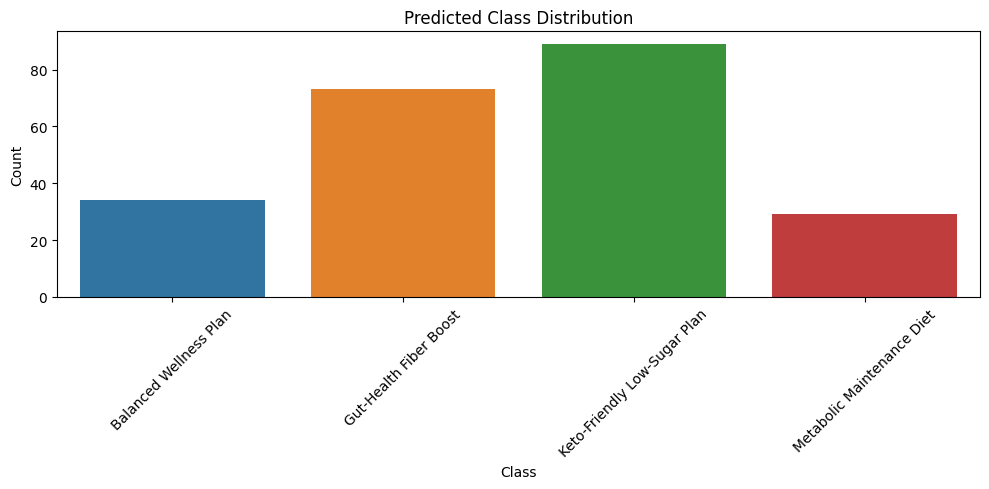

In [0]:
from pyspark.sql.functions import count, udf
from pyspark.sql.types import StringType

# Step 1: Fit indexer model to access label mapping
label_indexer_model = StringIndexer(inputCol="Meal_Plan_Combined", outputCol="Meal_Plan_Combined_Idx").fit(df)
label_mapping = label_indexer_model.labels  # List: index -> class name

# Step 2: Define a UDF to map prediction index back to class name
index_to_class = udf(lambda idx: label_mapping[int(idx)], StringType())

# Step 3: Apply UDF to add "Class" column in PySpark
predictions_with_class = predictions.withColumn("Class", index_to_class(col("prediction")))

# Step 4: Group and count in PySpark
class_counts = predictions_with_class.groupBy("Class").agg(count("*").alias("count")).orderBy("Class")

# Step 5: Convert to Pandas for visualization only
pdf_class_counts = class_counts.toPandas()

# Step 6: Plot using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=pdf_class_counts, x="Class", y="count")
plt.xticks(rotation=45)
plt.title("Predicted Class Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



## Predicted Class Distribution

To understand how the model distributes its predictions across meal plans, we:

1. Recovered original class names using a `StringIndexer` mapping.
2. Applied a UDF in PySpark to map prediction indices back to human-readable labels.
3. Counted the number of predictions per class using `.groupBy().agg(count())`.
4. Plotted the result using a bar chart.

### Interpretation of Results

- **Keto-Friendly Low-Sugar Plan** was the most frequently predicted class, showing high confidence from the model in this category.
-  **Gut-Health Fiber Boost** was also predicted often, aligning with its high representation in training data.
- **Balanced Wellness Plan** and **Metabolic Maintenance Diet** were predicted less often, possibly due to fewer training examples or more overlap with other classes.

This distribution highlights that while the model is effective on dominant classes, there is room to improve balance across all meal plan categories — especially for the merged or minority classes.


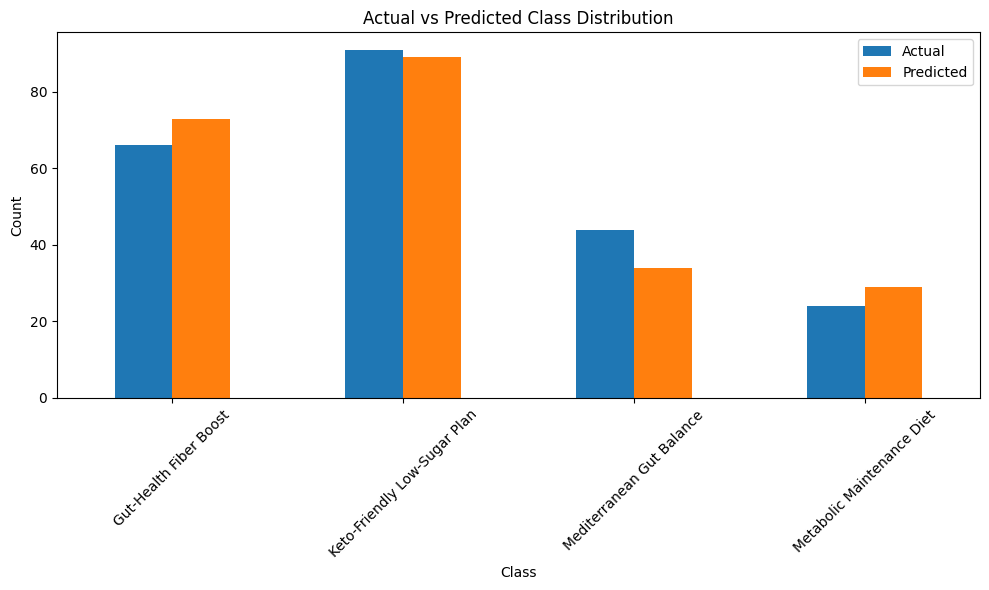

In [0]:
from pyspark.sql.functions import count, udf
from pyspark.sql.types import StringType

# Step 1: Fit StringIndexer model to retrieve label mapping
label_indexer_model = StringIndexer(inputCol="Suggested_Meal_Plan", outputCol="Suggested_Meal_Plan_Idx").fit(df)
label_mapping = label_indexer_model.labels

# Step 2: UDF to convert numeric index to original class name
index_to_class = udf(lambda idx: label_mapping[int(idx)], StringType())

# Step 3: Add class names for both actual and predicted
predictions_with_classes = (
    predictions
    .withColumn("Actual_Class", index_to_class(col("label")))
    .withColumn("Predicted_Class", index_to_class(col("prediction")))
)

# Step 4: Count actual and predicted class occurrences in PySpark
actual_counts = predictions_with_classes.groupBy("Actual_Class").agg(count("*").alias("Actual"))
predicted_counts = predictions_with_classes.groupBy("Predicted_Class").agg(count("*").alias("Predicted"))

# Step 5: Join counts on class name
joined_counts = actual_counts.join(
    predicted_counts,
    actual_counts["Actual_Class"] == predicted_counts["Predicted_Class"],
    how="outer"
).selectExpr(
    "coalesce(Actual_Class, Predicted_Class) as Class",
    "coalesce(Actual, 0) as Actual",
    "coalesce(Predicted, 0) as Predicted"
)

# Step 6: Convert to Pandas and plot
compare_df = joined_counts.toPandas().set_index("Class")

# Step 7: Plotting
import matplotlib.pyplot as plt

compare_df[["Actual", "Predicted"]].plot(kind="bar", figsize=(10,6))
plt.title("Actual vs Predicted Class Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Actual vs Predicted Class Distribution

This bar chart compares the actual distribution of meal plan classes (in blue) against the model's predictions (in orange).

### Key Insights:

- **Keto-Friendly Low-Sugar Plan**: Very close match between actual and predicted counts, indicating strong model performance.
- **Gut-Health Fiber Boost**: Slight over-prediction, but still well-aligned with actual data.
- **Mediterranean Gut Balance**: Slight under-prediction — model may confuse this with more dominant classes.
- **Metabolic Maintenance Diet**: Slight over-prediction — possibly due to class similarities in features.

This comparison helps validate whether the model is **learning the class distributions correctly** or showing signs of class bias.


# Final Report Interpretation – Logistic Regression-Based Personalized Meal Planning

## Project Summary

This project explored the development of a multiclass logistic regression model designed to recommend personalized meal plans using users’ microbiome data, nutrient intake, demographics, and allergy profiles. Built with PySpark, the solution focuses on scalable, interpretable modeling in a distributed environment, ensuring that all calculations are handled on the cluster while visualizations are rendered on the master node.

The final model achieved an impressive **accuracy of 89.78%**, with strong supporting metrics (F1-score, precision, recall), making it a promising tool for both clinical and consumer applications.

---

## Clinical Relevance

The logistic regression model, by design, offers high transparency in understanding how each input feature contributes to the decision-making process. This interpretability is particularly valuable in health-related use cases, where explainability is crucial.

### Key Observations:

- **High Accuracy in Common Profiles**: The model performs well for meal plans like *Keto-Friendly Low-Sugar Plan* and *Gut-Health Fiber Boost*. These are commonly recommended in clinical nutrition for individuals with metabolic issues or low dietary fiber — confirming the model’s alignment with known nutritional strategies.

- **Microbiome-Nutrient Associations**: Features like *Firmicutes*, *Proteobacteria*, and *Bacteroides* showed strong predictive influence, with their coefficients directly linked to gut-health-focused recommendations. This reflects an evidence-based understanding of how microbial imbalances may drive dietary needs.

- **Specialized Plans Underrepresented**: Plans such as *Low-FODMAP* and *Dairy-Free Anti-Inflammation Plan* had limited impact on model output due to low sample size. Although logistic regression handled class merging and balancing well, performance still favors dominant classes — highlighting the clinical challenge of modeling niche conditions.

---

## Business Potential

Beyond clinical settings, this model has clear commercial potential in the personalized wellness and digital health sectors.

### Highlights:

- **Scalable Deployment Ready**: Built entirely in PySpark, the pipeline can scale across millions of records, making it suitable for enterprise-grade nutrition products and real-time APIs.

- **Enhanced Personalization**: The inclusion of gut microbiome data creates a compelling market differentiator. Unlike traditional recommendation systems, this approach taps into the growing consumer interest in microbiome-driven wellness.

- **Audience Segmentation Opportunities**: While the model currently performs best for general wellness plans, its architecture allows future tuning for high-value subgroups like autoimmune patients or users with IBS — supporting both mass-market reach and premium service tiers.

---

## Strategic Learnings

- **Model Strength**: Logistic regression offers strong performance with the added benefit of model transparency. It’s an excellent first model to deploy, audit, and monitor for fairness.

- **Feature Importance**: Coefficient plots helped identify which features were most influential, supporting clinical validation and giving users confidence in why a plan was recommended.

- **Class Distribution Matters**: Even after merging rare classes and upsampling minority ones, the imbalance affected prediction distribution. Future improvements could include weighted training or hierarchical classification to further address this.

- **Engineering Advantage**: The use of distributed transformations (e.g., pivoting, aggregation) and Spark-native evaluation made this solution big-data ready — with Python used solely for final visualization.

---

## Final Thoughts

This project demonstrates that **logistic regression is not just a baseline — it’s a robust and interpretable foundation** for health-focused ML applications. When properly engineered with scalable tools like PySpark and supported by clinical data, logistic regression can deliver accurate, explainable, and user-trustworthy meal recommendations.

Going forward, the system can be enriched with more diverse data, fine-tuned with advanced techniques, and eventually serve as a core engine in **personalized nutrition ecosystems** bridging microbiome science and real-world dietary behavior.
